In [1]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def run_volatility_model(ticker):
    print(f"\nRunning volatility prediction for {ticker}...")

    df = yf.download(ticker, start="2023-04-01", end="2024-04-01")
    df.dropna(inplace=True)

    df["Volatility"] = (df["High"] - df["Low"]) / df["Open"]
    df["High_Volatility"] = df["Volatility"] > 0.05

    df["Prev_Volatility"] = df["Volatility"].shift(1)
    df["Avg_Volume_3D"] = df["Volume"].rolling(window=3).mean()
    df["Std_Close_3D"] = df["Close"].rolling(window=3).std()
    df["Momentum_3D"] = df["Close"] - df["Close"].shift(3)
    df["MA_7"] = df["Close"].rolling(window=7).mean()
    df["Daily_Return"] = df["Close"].pct_change()
    df["Range_Pct"] = (df["High"] - df["Low"]) / df["Close"]
    df["Rolling_Volatility_7D"] = df["Daily_Return"].rolling(window=7).std()

    df.dropna(inplace=True)

    features = [
        "Prev_Volatility",
        "Avg_Volume_3D",
        "Std_Close_3D",
        "Momentum_3D",
        "MA_7",
        "Daily_Return",
        "Range_Pct",
        "Rolling_Volatility_7D"
    ]

    X = df[features]
    y = df["High_Volatility"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    importances = model.feature_importances_
    sorted_idx = importances.argsort()
    plt.figure(figsize=(10,6))
    plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance for {ticker}")
    plt.show()



Running volatility prediction for TSLA...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



Confusion Matrix:
 [[40  0]
 [ 1  8]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99        40
        True       1.00      0.89      0.94         9

    accuracy                           0.98        49
   macro avg       0.99      0.94      0.96        49
weighted avg       0.98      0.98      0.98        49



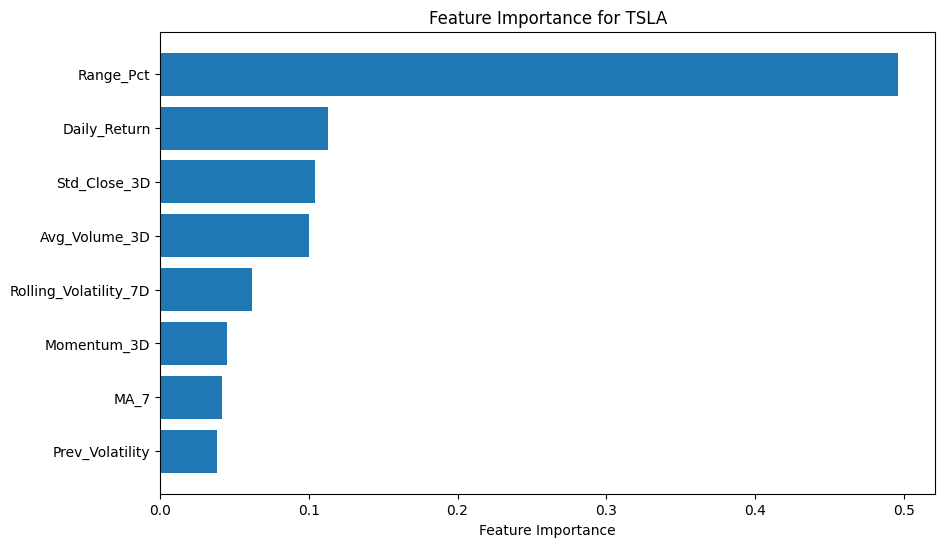

[*********************100%***********************]  1 of 1 completed


Running volatility prediction for AMZN...



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



Confusion Matrix:
 [[49]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        49

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



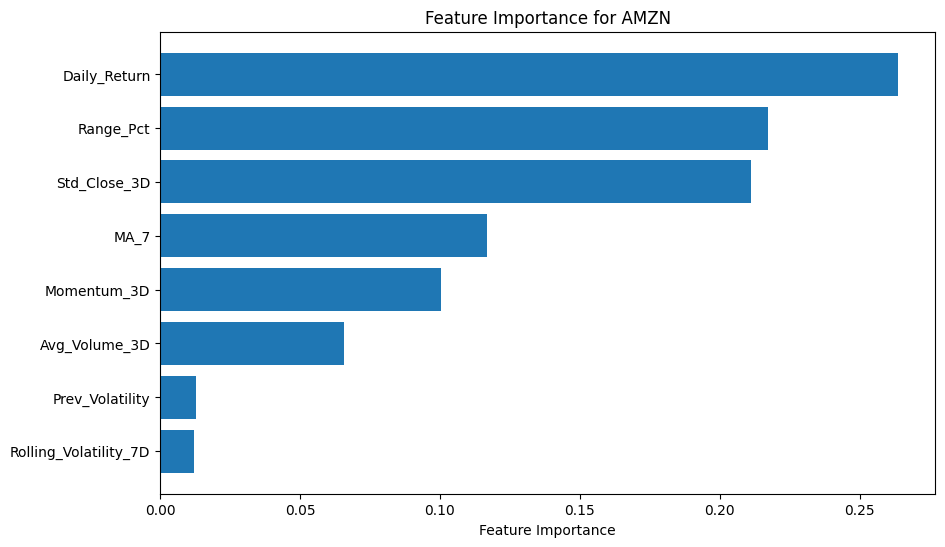


Running volatility prediction for NVDA...


[*********************100%***********************]  1 of 1 completed



Confusion Matrix:
 [[39  1]
 [ 2  7]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.97      0.96        40
        True       0.88      0.78      0.82         9

    accuracy                           0.94        49
   macro avg       0.91      0.88      0.89        49
weighted avg       0.94      0.94      0.94        49



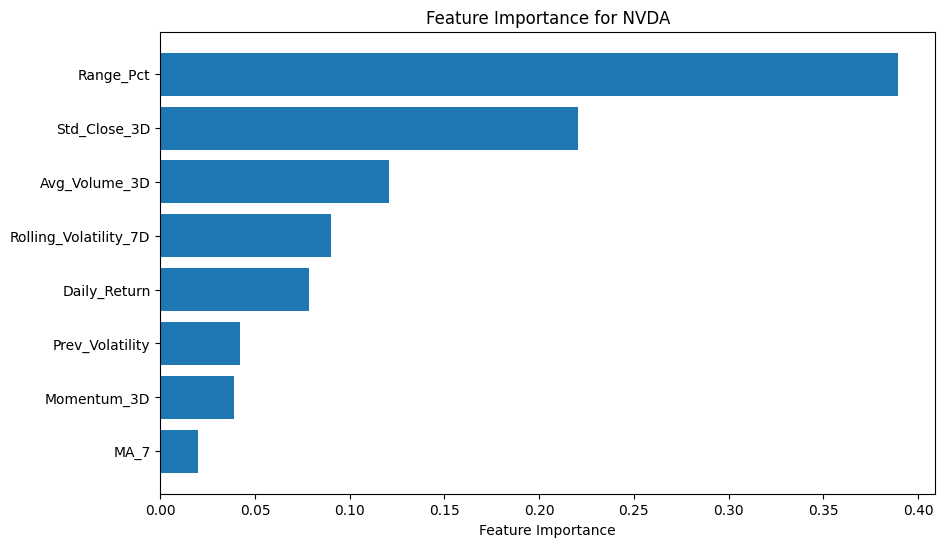

In [2]:
run_volatility_model("TSLA")
run_volatility_model("AMZN")
run_volatility_model("NVDA")
